In [1]:
EPSILON = 1e-10
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import max_error
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def r2(actual: np.ndarray, predicted: np.ndarray):
    return r2_score(actual, predicted)

def m_error(actual: np.ndarray, predicted: np.ndarray):
    return max_error(actual, predicted)

def _error(actual: np.ndarray, predicted: np.ndarray):
    """ Simple error """
    return actual - predicted


def _percentage_error(actual: np.ndarray, predicted: np.ndarray):
    """
    Percentage error
    Note: result is NOT multiplied by 100
    """
    return _error(actual, predicted) / (actual + EPSILON)


def _naive_forecasting(actual: np.ndarray, seasonality: int = 1):
    """ Naive forecasting method which just repeats previous samples """
    return actual[:-seasonality]


def _relative_error(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """ Relative Error """
    if benchmark is None or isinstance(benchmark, int):
        # If no benchmark prediction provided - use naive forecasting
        if not isinstance(benchmark, int):
            seasonality = 1
        else:
            seasonality = benchmark
        return _error(actual[seasonality:], predicted[seasonality:]) /\
               (_error(actual[seasonality:], _naive_forecasting(actual, seasonality)) + EPSILON)

    return _error(actual, predicted) / (_error(actual, benchmark) + EPSILON)


def _bounded_relative_error(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """ Bounded Relative Error """
    if benchmark is None or isinstance(benchmark, int):
        # If no benchmark prediction provided - use naive forecasting
        if not isinstance(benchmark, int):
            seasonality = 1
        else:
            seasonality = benchmark

        abs_err = np.abs(_error(actual[seasonality:], predicted[seasonality:]))
        abs_err_bench = np.abs(_error(actual[seasonality:], _naive_forecasting(actual, seasonality)))
    else:
        abs_err = np.abs(_error(actual, predicted))
        abs_err_bench = np.abs(_error(actual, benchmark))

    return abs_err / (abs_err + abs_err_bench + EPSILON)


def _geometric_mean(a, axis=0, dtype=None):
    """ Geometric mean """
    if not isinstance(a, np.ndarray):  # if not an ndarray object attempt to convert it
        log_a = np.log(np.array(a, dtype=dtype))
    elif dtype:  # Must change the default dtype allowing array type
        if isinstance(a, np.ma.MaskedArray):
            log_a = np.log(np.ma.asarray(a, dtype=dtype))
        else:
            log_a = np.log(np.asarray(a, dtype=dtype))
    else:
        log_a = np.log(a)
    return np.exp(log_a.mean(axis=axis))


def mse(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Squared Error """
    return mean_squared_error(actual, predicted)


def rmse(actual: np.ndarray, predicted: np.ndarray):
    """ Root Mean Squared Error """
    return np.sqrt(mse(actual, predicted))


def nrmse(actual: np.ndarray, predicted: np.ndarray):
    """ Normalized Root Mean Squared Error """
    return rmse(actual, predicted) / (actual.max() - actual.min())


def me(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Error """
    return np.mean(_error(actual, predicted))


def mae(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Absolute Error """
    return mean_absolute_error(actual, predicted)


mad = mae  # Mean Absolute Deviation (it is the same as MAE)


def gmae(actual: np.ndarray, predicted: np.ndarray):
    """ Geometric Mean Absolute Error """
    return _geometric_mean(np.abs(_error(actual, predicted)))


def mdae(actual: np.ndarray, predicted: np.ndarray):
    """ Median Absolute Error """
    return np.median(np.abs(_error(actual, predicted)))


def mpe(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Percentage Error """
    return np.mean(_percentage_error(actual, predicted))


def mape(actual: np.ndarray, predicted: np.ndarray):
    """
    Mean Absolute Percentage Error
    Properties:
        + Easy to interpret
        + Scale independent
        - Biased, not symmetric
        - Undefined when actual[t] == 0
    Note: result is NOT multiplied by 100
    """
    return np.mean(np.abs(_percentage_error(actual, predicted)))


def mdape(actual: np.ndarray, predicted: np.ndarray):
    """
    Median Absolute Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.median(np.abs(_percentage_error(actual, predicted)))


def smape(actual: np.ndarray, predicted: np.ndarray):
    """
    Symmetric Mean Absolute Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.mean(2.0 * np.abs(actual - predicted) / ((np.abs(actual) + np.abs(predicted)) + EPSILON))


def smdape(actual: np.ndarray, predicted: np.ndarray):
    """
    Symmetric Median Absolute Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.median(2.0 * np.abs(actual - predicted) / ((np.abs(actual) + np.abs(predicted)) + EPSILON))


def maape(actual: np.ndarray, predicted: np.ndarray):
    """
    Mean Arctangent Absolute Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.mean(np.arctan(np.abs((actual - predicted) / (actual + EPSILON))))


def mase(actual: np.ndarray, predicted: np.ndarray, seasonality: int = 1):
    """
    Mean Absolute Scaled Error
    Baseline (benchmark) is computed with naive forecasting (shifted by @seasonality)
    """
    return mae(actual, predicted) / mae(actual[seasonality:], _naive_forecasting(actual, seasonality))


def std_ae(actual: np.ndarray, predicted: np.ndarray):
    """ Normalized Absolute Error """
    __mae = mae(actual, predicted)
    return np.sqrt(np.sum(np.square(_error(actual, predicted) - __mae))/(len(actual) - 1))


def std_ape(actual: np.ndarray, predicted: np.ndarray):
    """ Normalized Absolute Percentage Error """
    __mape = mape(actual, predicted)
    return np.sqrt(np.sum(np.square(_percentage_error(actual, predicted) - __mape))/(len(actual) - 1))


def rmspe(actual: np.ndarray, predicted: np.ndarray):
    """
    Root Mean Squared Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.sqrt(np.mean(np.square(_percentage_error(actual, predicted))))


def rmdspe(actual: np.ndarray, predicted: np.ndarray):
    """
    Root Median Squared Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.sqrt(np.median(np.square(_percentage_error(actual, predicted))))


def rmsse(actual: np.ndarray, predicted: np.ndarray, seasonality: int = 1):
    """ Root Mean Squared Scaled Error """
    q = np.abs(_error(actual, predicted)) / mae(actual[seasonality:], _naive_forecasting(actual, seasonality))
    return np.sqrt(np.mean(np.square(q)))


def inrse(actual: np.ndarray, predicted: np.ndarray):
    """ Integral Normalized Root Squared Error """
    return np.sqrt(np.sum(np.square(_error(actual, predicted))) / np.sum(np.square(actual - np.mean(actual))))


def rrse(actual: np.ndarray, predicted: np.ndarray):
    """ Root Relative Squared Error """
    return np.sqrt(np.sum(np.square(actual - predicted)) / np.sum(np.square(actual - np.mean(actual))))


def mre(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """ Mean Relative Error """
    return np.mean(_relative_error(actual, predicted, benchmark))


def rae(actual: np.ndarray, predicted: np.ndarray):
    """ Relative Absolute Error (aka Approximation Error) """
    return np.sum(np.abs(actual - predicted)) / (np.sum(np.abs(actual - np.mean(actual))) + EPSILON)


def mrae(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """ Mean Relative Absolute Error """
    return np.mean(np.abs(_relative_error(actual, predicted, benchmark)))


def mdrae(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """ Median Relative Absolute Error """
    return np.median(np.abs(_relative_error(actual, predicted, benchmark)))


def gmrae(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """ Geometric Mean Relative Absolute Error """
    return _geometric_mean(np.abs(_relative_error(actual, predicted, benchmark)))


def mbrae(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """ Mean Bounded Relative Absolute Error """
    return np.mean(_bounded_relative_error(actual, predicted, benchmark))


def umbrae(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """ Unscaled Mean Bounded Relative Absolute Error """
    __mbrae = mbrae(actual, predicted, benchmark)
    return __mbrae / (1 - __mbrae)


def mda(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))


METRICS = {
#     'mse': mse,
    'mae': mae,
    'rmse': rmse,
    'nrmse': nrmse,
    'max_error':m_error,
#     'me': me,
#     'mad': mad,
#     'gmae': gmae,
#     'mdae': mdae,
#     'mpe': mpe,
#     'mape': mape,
#     'mdape': mdape,
#     'smape': smape,
#     'smdape': smdape,
#     'maape': maape,
#     'mase': mase,
#     'std_ae': std_ae,
#     'std_ape': std_ape,
#     'rmspe': rmspe,
#     'rmdspe': rmdspe,
#     'rmsse': rmsse,
#     'inrse': inrse,
#     'rrse': rrse,
#     'mre': mre,
#     'rae': rae,
#     'mrae': mrae,
#     'mdrae': mdrae,
#     'gmrae': gmrae,
#     'mbrae': mbrae,
#     'umbrae': umbrae,
#     'mda': mda,
#     'r2':r2,
}


def evaluate(actual: np.ndarray, predicted: np.ndarray, metrics=('mae', 'mse', 'smape', 'umbrae')):
    results = {}
    for name in metrics:
        try:
            results[name] = METRICS[name](actual, predicted)
        except Exception as err:
            results[name] = np.nan
            print('Unable to compute metric {0}: {1}'.format(name, err))
    return results


def evaluate_all(actual: np.ndarray, predicted: np.ndarray):
    return evaluate(actual, predicted, metrics=(METRICS.keys()))

In [4]:
Y_test_gap = np.load('RF_Y_test_gap.npy')
lstm_gap = np.load('LSTM_GAP.npy')
lasso_gap = np.load("LASSO_GAP.npy")
rf_gap = np.load("RF_gap.npy")
svr_gap = np.load('SVR_gap.npy')

In [3]:
Y_test_dam = np.load('RF_Y_test_dam.npy')
lstm_dam = np.load('LSTM_DAM.npy')
lasso_dam = np.load("LASSO_DAM.npy")
svr_dam = np.load("SVR_dam.npy")
rf_dam = np.load("RF_DAM.npy")


FileNotFoundError: [Errno 2] No such file or directory: 'RF_Y_test_dam.npy'

In [6]:
print(rf_gap)

[[-1.80712978]
 [-5.55051619]
 [ 0.99606665]
 ...
 [ 8.76320171]
 [11.80911176]
 [13.1222315 ]]


In [7]:
print(Y_test_gap)

[[-1.80712978]
 [-5.55051619]
 [ 0.99606665]
 ...
 [ 8.76320171]
 [11.80911176]
 [13.1222315 ]]


In [ ]:
Y_test_rtm = np.load('RF_Y_test_rtm.npy')
lstm_rtm = np.load('LSTM_RTM.npy')
lasso_rtm = np.load("LASSO_RTM.npy")
svr_rtm = np.load("SVR_rtm.npy")
rf_rtm = np.load("RF_rtm.npy")

In [3]:
evaluate_all(lasso_dam, Y_test_dam)

NameError: name 'lasso_dam' is not defined

In [4]:
evaluate_all(lasso_rtm, Y_test_rtm)

NameError: name 'lasso_rtm' is not defined

In [4]:
evaluate_all(lasso_gap, Y_test_gap)

Unable to compute metric mae: Found input variables with inconsistent numbers of samples: [1657, 1349]
Unable to compute metric rmse: Found input variables with inconsistent numbers of samples: [1657, 1349]
Unable to compute metric nrmse: Found input variables with inconsistent numbers of samples: [1657, 1349]
Unable to compute metric max_error: Found input variables with inconsistent numbers of samples: [1657, 1349]


{'mae': nan, 'rmse': nan, 'nrmse': nan, 'max_error': nan}

In [111]:
Y_test_rtm = np.load('SVR_Y_test_gap.npy')

In [125]:
Y_test_rtm1 = np.load('RF_Y_test_rtm.npy')

In [126]:
Y_test_rtm1

array([37.5068 , 31.70769, 28.23573, ..., 37.75954, 42.0085 , 46.55265])

In [121]:
svr_gap

array([[12.25162176],
       [16.16259746],
       [-3.06031023],
       ...,
       [11.3115414 ],
       [ 2.42259043],
       [ 3.54452761]])

In [118]:
Y_test_rtm1

array([ 4.1856 ,  5.34549,  8.83324, ...,  0.94161, -4.39969, -9.05875])

In [5]:
df = pd.read_pickle('df.pkl')

In [127]:
df[('RTM LMP_PRC', 1)]

0         0.10000
1        27.56990
2        18.16000
3         0.00994
4        15.82752
           ...   
14803    33.48506
14804    38.53055
14805    37.75954
14806    42.00850
14807    46.55265
Name: (RTM LMP_PRC, 1), Length: 14808, dtype: float64

In [190]:
evaluate_all(Y_test_rtm, lstm_rtm[1549-1481:])

{'max_error': 1060.7620753784179,
 'mse': 3531.517334114599,
 'rmse': 59.42657094359895,
 'nrmse': 0.051226327096255596,
 'me': -6.577950888880614,
 'mae': 22.952249837038813,
 'mad': 22.952249837038813,
 'gmae': array([12.27102844]),
 'mdae': 15.49813694946289,
 'mpe': -284881156.2051515,
 'mape': 284881208.9933369,
 'mdape': 0.3748834813111562,
 'smape': 0.4558789728883083,
 'smdape': 0.3424756620565104,
 'maape': 0.4524296650487483,
 'mase': 1.2602041964401804,
 'std_ae': 66.0547256954887,
 'std_ape': 10978105021.638975,
 'rmspe': 10963299747.6095,
 'rmdspe': 0.3748834813111562,
 'rmsse': 3.262844148825952,
 'inrse': 0.9836204138006742,
 'rrse': 0.9836204138006742,
 'mre': 2603.627655898531,
 'rae': 1.0610762355404162,
 'mrae': 2856.6428832563724,
 'mdrae': 2.5141556421644213,
 'gmrae': array([2.72659486]),
 'mbrae': 0.657328327145133,
 'umbrae': 1.9182453036423985,
 'mda': 0.629054054054054,
 'r2': 0.032490881554590345}

In [142]:
lstm_dam[:]

SyntaxError: invalid syntax (<ipython-input-142-5f65e7c12b9b>, line 1)

In [141]:
Y_test_dam[:8]

array([[38.19616],
       [36.22877],
       [35.3242 ],
       [36.33631],
       [39.77706],
       [46.71887],
       [42.97229],
       [32.16187]])

In [6]:
true_value = []
for i in range (len(Y_test_gap)):
    true_value.append(Y_test_gap[i][0])

In [7]:
lstm_pred = []
for i in range (len(lstm_gap)):
    lstm_pred.append(lstm_gap[i][0])

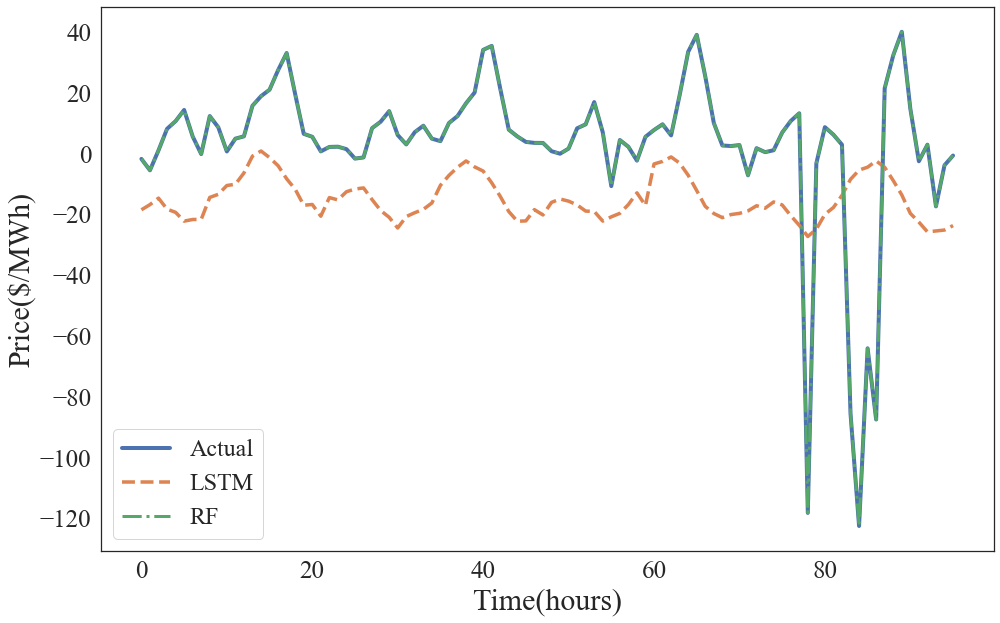

In [5]:

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "normal"
sns.set(rc={'figure.figsize':(16,10)})
sns.set_style("white")
plt.rcParams["font.family"] = "Times New Roman"
# plt.rcParams.update({'font.size': 22})
fig = plt.figure(facecolor='white') 
ax = fig.add_subplot(111) 
start = 0
end = start+96
plt.plot(Y_test_gap[:96], label='Actual',linewidth=4, linestyle='solid') 
plt.plot(lstm_gap[:96], label='LSTM', linewidth=3.5, linestyle='dashed') 
plt.plot(rf_gap[:96], label='RF', linewidth=3, linestyle='dashdot') 

# plt.plot(lasso_gap[:96], label='LASSO', linestyle='dotted', linewidth=2) 
# plt.plot(svr_gap[:96], label='SVR', linestyle=(0, (5, 1)), linewidth=2) 
# ax.set(xlabel='Time (hours)', ylabel="Price ($/MWh)")
ax.set_xlabel("Time(hours)", fontsize=30)
ax.set_ylabel("Price($/MWh)",fontsize=30)
ax.tick_params(labelsize=25)


plt.legend(prop={'size': 24}) 
# plt.title('gela',prop={'size': 14})
plt.savefig('evaluate_gap.pdf', bbox_inches='tight')
plt.show() 
#remove grid
#font times new roman 11 or 10
#color of the font is black and axis
#title impact of spatial temporal 

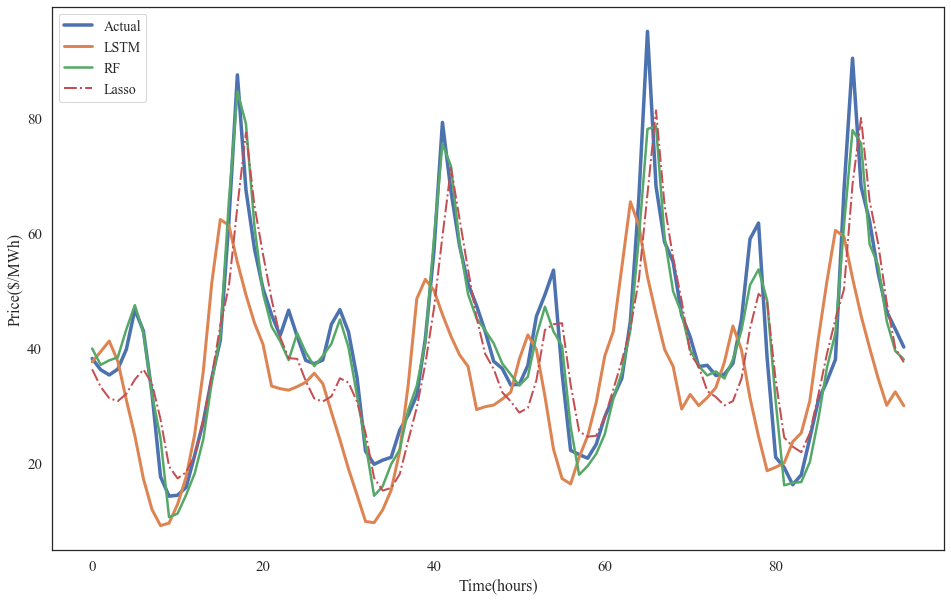

In [187]:

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "normal"
sns.set(rc={'figure.figsize':(16,10)})
sns.set_style("white")
plt.rcParams["font.family"] = "Times New Roman"
# plt.rcParams.update({'font.size': 22})
fig = plt.figure(facecolor='white') 
ax = fig.add_subplot(111) 
start = 0
end = start+96
plt.plot(Y_test_dam[:96], label='Actual',linewidth=3.5) 
plt.plot(lstm_dam[:96], label='LSTM', linewidth=3) 
plt.plot(rf_dam[:96], label='RF', linewidth=2.5) 

plt.plot(lasso_dam[:96], label='Lasso', linestyle='dashdot', linewidth=2) 
# ax.set(xlabel='Time (hours)', ylabel="Price ($/MWh)")
ax.set_xlabel("Time(hours)",fontsize=16)
ax.set_ylabel("Price($/MWh)",fontsize=16)
ax.tick_params(labelsize=15)


plt.legend(prop={'size': 14}) 
# plt.title('gela',prop={'size': 14})
plt.savefig('evaluate_dam.pdf', bbox_inches='tight')
plt.show() 
#remove grid
#font times new roman 11 or 10
#color of the font is black and axis
#title impact of spatial temporal 

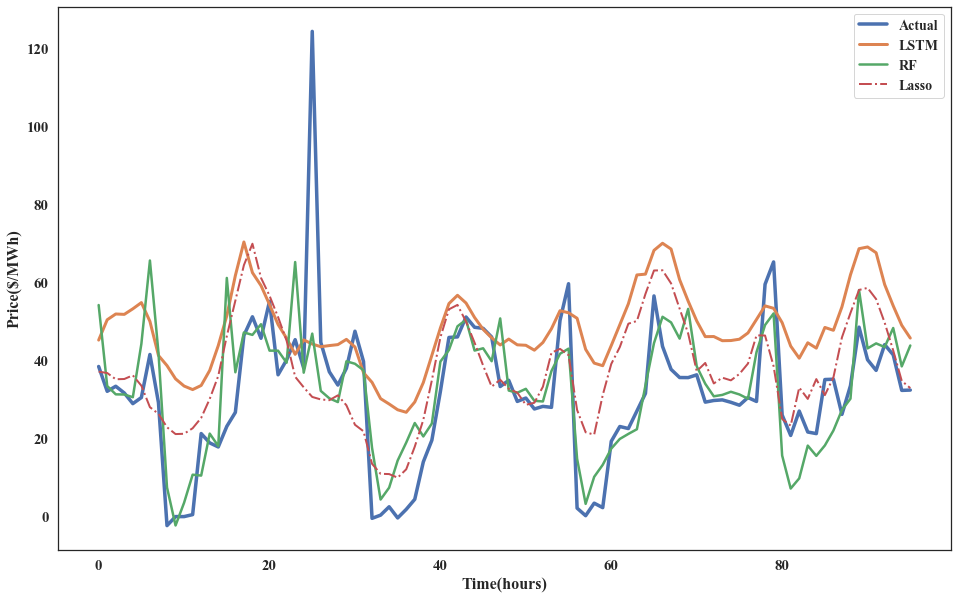

In [194]:

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
sns.set(rc={'figure.figsize':(16,10)})
sns.set_style("white")
plt.rcParams["font.family"] = "Times New Roman"
# plt.rcParams.update({'font.size': 22})
fig = plt.figure(facecolor='white') 
ax = fig.add_subplot(111) 
start = 0
end = start+96
plt.plot(Y_test_rtm[:96], label='Actual',linewidth=3.5) 
plt.plot(lstm_rtm[1549-1481:1549-1481+96], label='LSTM', linewidth=3) 
plt.plot(rf_rtm[:96], label='RF', linewidth=2.5) 

plt.plot(lasso_rtm[:96], label='Lasso', linestyle='dashdot', linewidth=2) 
# ax.set(xlabel='Time (hours)', ylabel="Price ($/MWh)")
ax.set_xlabel("Time(hours)",fontsize=16)
ax.set_ylabel("Price($/MWh)",fontsize=16)
ax.tick_params(labelsize=15)


plt.legend(prop={'size': 14}) 
# plt.title('gela',prop={'size': 14})
plt.savefig('evaluate_dam.pdf', bbox_inches='tight')
plt.show() 
#remove grid
#font times new roman 11 or 10
#color of the font is black and axis
#title impact of spatial temporal 

In [4]:
lasso_gap = np.load('LASSO_GAP.npy')
lasso_dam = np.load('LASSO_DAM.npy')
lasso_rtm = np.load('LASSO_RTM1.npy')

FileNotFoundError: [Errno 2] No such file or directory: 'LASSO_DAM.npy'

In [ ]:
svr_gap = np.load('LSTM_GAP.npy')
svr_dam = np.load('LSTM_DAM.npy')
svr_rtm = np.load('LSTM_RTM.npy')

In [3]:
lasso_gap = np.load('LASSO_GAP.npy')

In [106]:
actual_gap = np.load('actual_gap.npy')
actual_rtm = np.load('actual_RTM.npy')
# actual_dam = np.load('actual_DAM.npy')

In [65]:
len(lstm_rtm)

1549

In [66]:
df_gap = pd.DataFrame()
df_gap['actual_gap'] = list(Y_true.round(2))
df_gap['lasso_gap'] = list(lasso_gap.round(2))
df_gap['lstm_gap'] = list(lstm_gap.round(2))
# df_gap['svr_gap'] = list(svr_gap.round(2))
# df_gap['rf_gap'] = list(rf_gap.round(2))

ValueError: Length of values does not match length of index

In [116]:
evaluate_all(actual_rtm[:-24], lstm_rtm)

{'max_error': 1074.5534038085937,
 'mse': 3551.010796665515,
 'rmse': 59.59035825253541,
 'nrmse': 0.05136751347346988,
 'me': -7.927072642654609,
 'mae': 23.783410773172196,
 'mad': 23.783410773172196,
 'gmae': array([20.71030347, 16.51545866, 18.29959606, ..., 13.32129335,
        12.55785782, 14.33954191]),
 'mdae': 17.987265942382805,
 'mpe': -345957163.8561361,
 'mape': 345957231.04497415,
 'mdape': 0.42438683970060587,
 'smape': 0.5333538369119318,
 'smdape': 0.39270766477278507,
 'maape': 0.5124256293061794,
 'mase': 1.3308704001828355,
 'std_ae': 2722.9577614097116,
 'std_ape': 558884678955.6497,
 'rmspe': 14183029670.375439,
 'rmdspe': 0.42438683970060587,
 'rmsse': 3.467960488624147,
 'inrse': 41.03145836712731,
 'rrse': 41.03145836712731,
 'mre': 3299.527918741167,
 'rae': 1987.0342654045894,
 'mrae': 3651.7650948236633,
 'mdrae': 3.0156727077061474,
 'gmrae': array([ 3.7979961 ,  9.46446498,  7.06004378, ...,  6.61007033,
        15.4234598 ,  7.64585221]),
 'mbrae': 0.6863

In [121]:
evaluate_all(actual_rtm[:-3], lstm_rtm)

{'max_error': 1067.3518008728026,
 'mse': 3821.581661959117,
 'rmse': 61.818942582020256,
 'nrmse': 0.053288576526765184,
 'me': 11.20001535067114,
 'mae': 25.776494196263474,
 'mad': 25.776494196263474,
 'gmae': array([ 7.89330287,  8.30030876,  8.10345956, ..., 10.46582601,
         8.63559989, 10.46959736]),
 'mdae': 17.862209662780764,
 'mpe': -218271881.61578616,
 'mape': 218313028.42272103,
 'mdape': 0.45814778700566816,
 'smape': 0.6444464862613343,
 'smdape': 0.5090384205113141,
 'maape': 0.4874651061158406,
 'mase': 1.4519963881092381,
 'std_ae': 2514.7246116270708,
 'std_ape': 387061993551.3079,
 'rmspe': 9758129353.12733,
 'rmdspe': 0.45814778700566894,
 'rmsse': 3.5350652719924645,
 'inrse': 42.0777521419264,
 'rrse': 42.0777521419264,
 'mre': 2078.157552932023,
 'rae': 1984.7943344234923,
 'mrae': 2312.129368736918,
 'mdrae': 3.0143901509384863,
 'gmrae': array([1.91033799, 4.19525401, 3.67040485, ..., 1.55159028, 1.69751427,
        2.0748257 ]),
 'mbrae': 0.6897065296128

In [95]:
def plot_results(predicted_data, true_data): 
    fig = plt.figure(facecolor='white') 
    ax = fig.add_subplot(111) 
    ax.plot(true_data, label='True Data') 
    plt.plot(predicted_data, label='Prediction') 
    plt.legend() 
    plt.show() 

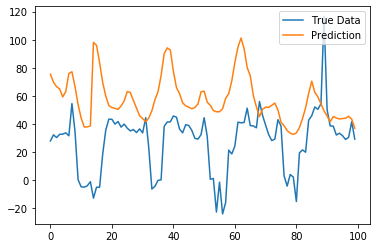

In [112]:
plot_results(lstm_rtm[:100], actual_rtm[:-24][:100])

In [98]:
actual_gap

array([0.39783355, 0.39624642, 0.39631112, ..., 0.39565383, 0.39423513,
       0.39299764])

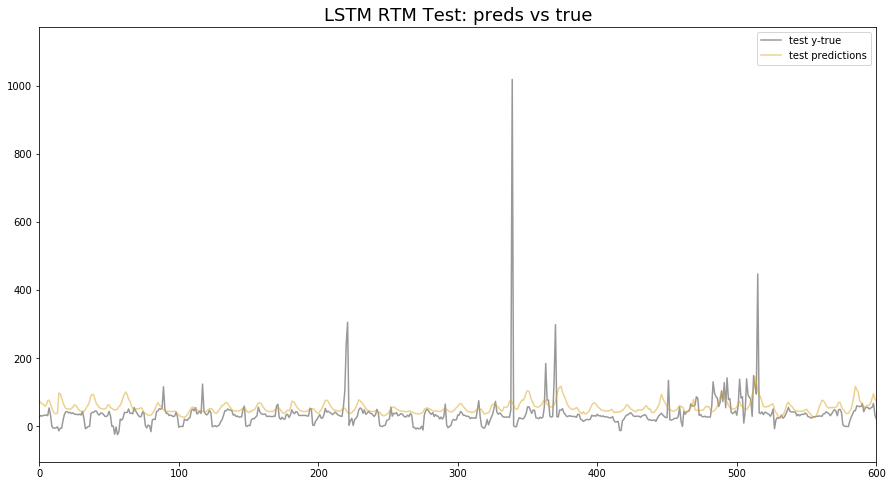

In [113]:

plt.figure(figsize=(15,8))
day = 34
plt.plot(actual_rtm[:-24],
         label='test y-true',
         alpha = 0.8,
         color='grey')
plt.plot(lstm_rtm,
         label='test predictions',
         alpha = 0.5,
         color='goldenrod')
plt.legend()
plt.xlim(0, 600)
plt.title('LSTM RTM Test: preds vs true', fontsize=18)
# plt.savefig('../images/dam_RNN_12_test_pred_vs_true_zoomed.jpg', bbox_inches='tight')
plt.show();